# Worksheet 15

Name:  Wentao Zheng
UID: U87913480

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

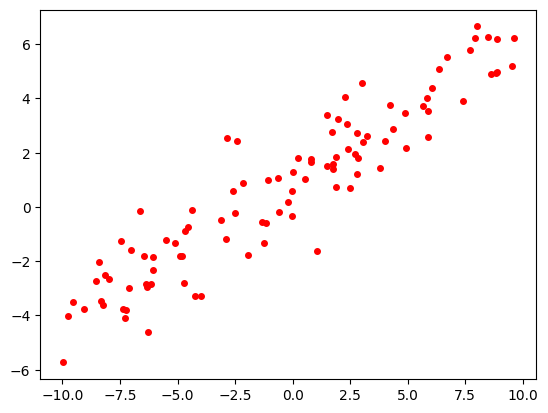

In [2]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = beta[0]+(beta[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

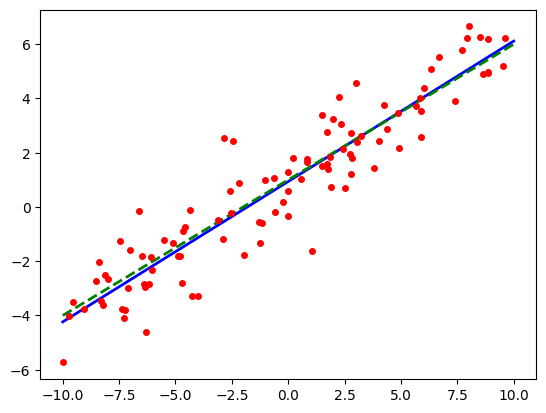

In [3]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta_est = np.linalg.inv(X.T @ X) @ X.T @ ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot
y_true = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xplot, y_true,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()


c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate is quite similar to the parameters we used to generate the data, but they are not exactly the same.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

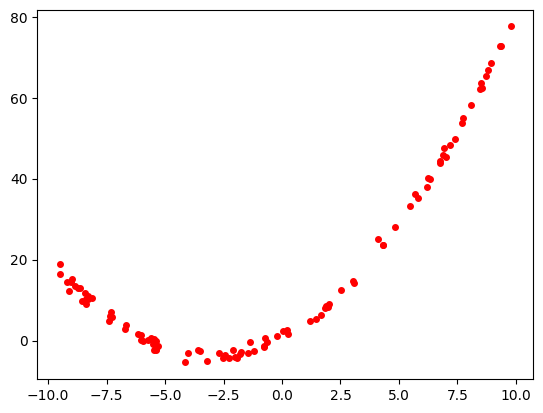

In [4]:
beta = np.array([ 1 , 3, .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = beta[0] + (beta[1]*xlin) + (beta[2]*xlin ** 2) +np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

In [5]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin, xlin ** 2]).T
beta_est = np.linalg.inv(X.T @ X) @ X.T @ ylin
print(beta_est)

[1.00535618 3.04006007 0.49906689]


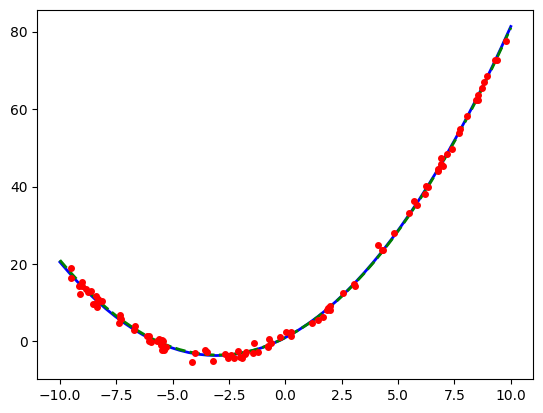

In [6]:
xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot + beta_est[2] * xplot ** 2
y_true = beta[0] + beta[1] * xplot + beta[2] * xplot ** 2

plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xplot, y_true,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

They are slightly different.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

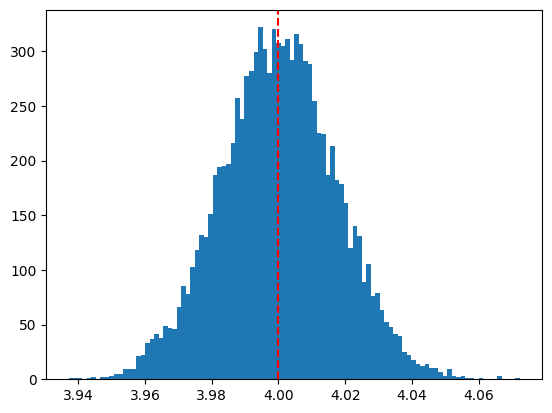

In [7]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([3, 4])
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + true_beta[1] * xlin + np.random.randn(100)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ ylin)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()